In [1]:
bild = 'assets/DSC_0410.jpg'

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
import time




from matplotlib.widgets import Button
from IPython.display import display, clear_output
from jupyter_ui_poll import ui_events


In [2]:
# Define function to handle mouse click event
def onclick(event):
    if event.inaxes == ax:
        x = int(event.xdata)
        y = int(event.ydata)
        clicked_points.append((x, y))
        ax.plot(x, y, 'ro')  # Plot a red dot at the clicked position
        fig.canvas.draw()

# Define function to handle button click event
def on_continue():
    time.sleep(0.1)
    plt.close()
    global waiting
    waiting = False

def on_reset_button_clicked(b):
    global clicked_points
    clicked_points = []
    ax.clear()
    ax.imshow(image)
    input_widget.value = ''
    fig.canvas.draw()

Label(value='Please select the four corners of your target by clicking on them in any order.')

Button(description='Reset', style=ButtonStyle())

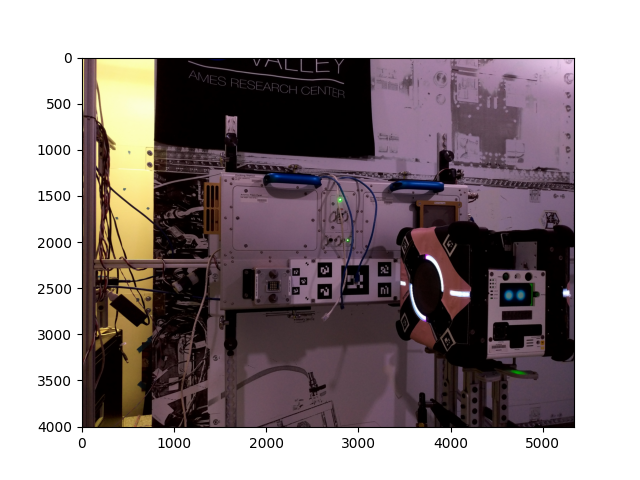

In [ ]:
waiting = True

# Load your image
image = plt.imread(bild)

# Initialize list to store clicked coordinates
clicked_points = []

# Create a figure and axis
fig, ax = plt.subplots()
ax.imshow(image)

# Connect the onclick function to the mouse click event
cid = fig.canvas.mpl_connect('button_press_event', onclick)

# Create a widgets
prompt_label = widgets.Label(value = 'Please select the four corners of your target by clicking on them in any order.')
#continue_button = widgets.Button(description = 'Continue')
reset_button = widgets.Button(description = 'Reset')

display(prompt_label)
display(reset_button)
plt.show()


# Attach button click event handlers
reset_button.on_click(on_reset_button_clicked)

with ui_events() as poll:
    while waiting == True:
        if len(clicked_points) == 4:
            on_continue()
            
        #waiting for user input
        poll(10) # poll queued UI events including button
        pass

In [ ]:
print("Clicked points:", clicked_points)